# Model Results - Bubbling Effect on Air-Sea Gas Echange 
* Wave breaking is formed from additional momentum generated from wind
* It transfers momentum into sublayers
* Bubbles from breaking trap air from the atmosphere into the ocean   
* The trapped air enhanced gas exchange into ocean

This program analyzes the results of model for investigating the effect of bubbling on air-sea gas exchange using Bio Fennel model from the Regional Ocean Modeling System (ROMS).

The original Bio-Fennel Model does not consider the effect of bubbling on gas exchange. Therefore, the model was parameterized for Oxygen exchange using Liang et al. parameterization to see the effect of bubbling.


- Developed by Amin Ilia, Oct 2019
- Department of Marine Sciences
- University of Connecticut

In [1]:
# Import libs
import matplotlib.pyplot as plt
import datetime
import numpy as np

import netCDF4 as nc

### Phytoplankton mortarity range
Fennel et al. (2006) suggest the phytoplankton mortality rate 0.05 to 0.25 per day.
The default value is 0.15 in the Fennel model.
Here we ran the model with setting phytoplankton mortality rate of 0.05, 0.10, 0.15, 0.20, and 0.25.

In [2]:
# read Bio Fennel model outputs in netcdf
# model history files
dhn=nc.Dataset('roms_his_Orginal.nc','r') # model history files without bubbling
dhb=nc.Dataset('roms_his_Bubble.nc','r') # model history files with bubbling
ddn=nc.Dataset('roms_dia_Orginal.nc','r') # model diagnostic files without bubbling
ddb=nc.Dataset('roms_dia_Bubble.nc','r') # model diagnostic files with bubbling

dhp=nc.Dataset('roms_his_wind_p.nc','r') # model history files wind forcing plus 1 m/s
ddp=nc.Dataset('roms_dia_wind_p.nc','r') # model diagnostic files wind forcing plus 1 m/s
dw=nc.Dataset('bio_toy_frc.nc','r') # wind forcing Orginal
dwp=nc.Dataset('bio_toy_frc_wind_p1.nc','r') # wind forcing plus 1 m/s

dht=nc.Dataset('roms_his_Temp.nc','r') # model history files wind forcing plus 1 m/s
ddt=nc.Dataset('roms_dia_Temp.nc','r') # model diagnostic files wind forcing plus 1 m/s

In [3]:
for i in dhn.variables:   # Check varibles and sizes in hsr file 
    print(i, dhn.variables[i].shape, dhn.variables[i].dimensions)

ntimes () ()
ndtfast () ()
dt () ()
dtfast () ()
dstart () ()
nHIS () ()
ndefHIS () ()
nRST () ()
ntsAVG () ()
nAVG () ()
ndefAVG () ()
ntsDIA () ()
nDIA () ()
ndefDIA () ()
Falpha () ()
Fbeta () ()
Fgamma () ()
Akt_bak (14,) ('tracer',)
Akv_bak () ()
rdrg () ()
rdrg2 () ()
Zob () ()
Zos () ()
Znudg () ()
M2nudg () ()
M3nudg () ()
Tnudg (14,) ('tracer',)
rho0 () ()
gamma2 () ()
LuvSrc () ()
LwSrc () ()
LtracerSrc (14,) ('tracer',)
LsshCLM () ()
Lm2CLM () ()
Lm3CLM () ()
LtracerCLM (14,) ('tracer',)
LnudgeM2CLM () ()
LnudgeM3CLM () ()
LnudgeTCLM (14,) ('tracer',)
BioIter () ()
AttSW () ()
AttChl () ()
PARfrac () ()
Vp0 () ()
I_thNH4 () ()
D_p5NH4 () ()
NitriR () ()
K_NO3 () ()
K_NH4 () ()
K_Phy () ()
Chl2C_m () ()
ChlMin () ()
PhyCN () ()
PhyIP () ()
PhyIS () ()
PhyMin () ()
PhyMR () ()
ZooAE_N () ()
ZooBM () ()
ZooCN () ()
ZooER () ()
ZooGR () ()
ZooMin () ()
ZooMR () ()
LDeRRN () ()
LDeRRC () ()
CoagR () ()
SDeRRN () ()
SDeRRC () ()
wPhy () ()
wLDet () ()
wSDet () ()
pCO2air () ()
sph

In [4]:
for i in ddn.variables:   # Check varibles and sizes in dia file 
    print(i, ddn.variables[i].shape, ddn.variables[i].dimensions)

ntimes () ()
ndtfast () ()
dt () ()
dtfast () ()
dstart () ()
nHIS () ()
ndefHIS () ()
nRST () ()
ntsAVG () ()
nAVG () ()
ndefAVG () ()
ntsDIA () ()
nDIA () ()
ndefDIA () ()
Falpha () ()
Fbeta () ()
Fgamma () ()
Akt_bak (14,) ('tracer',)
Akv_bak () ()
rdrg () ()
rdrg2 () ()
Zob () ()
Zos () ()
Znudg () ()
M2nudg () ()
M3nudg () ()
Tnudg (14,) ('tracer',)
rho0 () ()
gamma2 () ()
LuvSrc () ()
LwSrc () ()
LtracerSrc (14,) ('tracer',)
LsshCLM () ()
Lm2CLM () ()
Lm3CLM () ()
LtracerCLM (14,) ('tracer',)
LnudgeM2CLM () ()
LnudgeM3CLM () ()
LnudgeTCLM (14,) ('tracer',)
BioIter () ()
AttSW () ()
AttChl () ()
PARfrac () ()
Vp0 () ()
I_thNH4 () ()
D_p5NH4 () ()
NitriR () ()
K_NO3 () ()
K_NH4 () ()
K_Phy () ()
Chl2C_m () ()
ChlMin () ()
PhyCN () ()
PhyIP () ()
PhyIS () ()
PhyMin () ()
PhyMR () ()
ZooAE_N () ()
ZooBM () ()
ZooCN () ()
ZooER () ()
ZooGR () ()
ZooMin () ()
ZooMR () ()
LDeRRN () ()
LDeRRC () ()
CoagR () ()
SDeRRN () ()
SDeRRC () ()
wPhy () ()
wLDet () ()
wSDet () ()
pCO2air () ()
sph

In [6]:
for i in dw.variables:   # Check varibles and sizes in wind forcing file 
    print(i, dw.variables[i].shape, dw.variables[i].dimensions)

frc_time (365,) ('frc_time',)
Pair (365,) ('frc_time',)
Uwind (365,) ('frc_time',)
Vwind (365,) ('frc_time',)
Tair (365,) ('frc_time',)
Qair (365,) ('frc_time',)
rain (365,) ('frc_time',)
swrad (365,) ('frc_time',)
lwrad (365,) ('frc_time',)
SST (365,) ('frc_time',)


In [5]:
# Depths at sigma layers in Bio Fennel model
z_rho=dhn.variables['z_rho'][:]
print(z_rho[-1,:,3,3])

[-201.96939   -186.49104   -173.02438   -161.21988   -150.76761
 -141.38739   -132.82028   -124.82234   -117.16179   -109.62193
 -102.01202    -94.187325   -86.07606    -77.70427    -69.204636
  -60.796368   -52.735718   -45.254112   -38.50901    -32.564507
  -27.40115    -22.942348   -19.083122   -15.712609   -12.727884
  -10.040414    -7.577613    -5.281728    -3.1075823   -1.0200678]


## Select Model Parameters
We select phytoplankton, oxygen, zooplankton, and nitrate as the main parameters affected by phytoplankton mortality rate change.

In [7]:
# Export varibles from bio Fennel model 
# without bubbling
Nn=dhn.variables['NO3'][:]
Zn=dhn.variables['zooplankton'][:]
Pn=dhn.variables['phytoplankton'][:]
On=dhn.variables['oxygen'][:]

# without bubbling
Nb=dhb.variables['NO3'][:]
Zb=dhb.variables['zooplankton'][:]
Pb=dhb.variables['phytoplankton'][:]
Ob=dhb.variables['oxygen'][:]
htime=dhb.variables['ocean_time'][:]
PPb=ddb.variables['P_Production'][:]
dhn.variables['oxygen'].units
ddn.variables['P_Production'].units

'millimole_nitrogen meter-3 day-1'

### 1. Oxygen


In [8]:
Uwind=dw.variables['Uwind']
Vwind=dw.variables['Vwind']
wtime=dw.variables['frc_time']
wtime=np.asarray(wtime)
WS=np.sqrt(np.power(Uwind, 2)+np.power(Vwind, 2))

In [9]:
# Export O2 Air Sea Exchange
dtime=ddn.variables['ocean_time'][:]

Oairn=ddn.variables['O2_airsea'][:]

Oairb=ddb.variables['O2_airsea'][:]
ddn.variables['O2_airsea'].units

'millimole_oxygen meter-2 day-1'

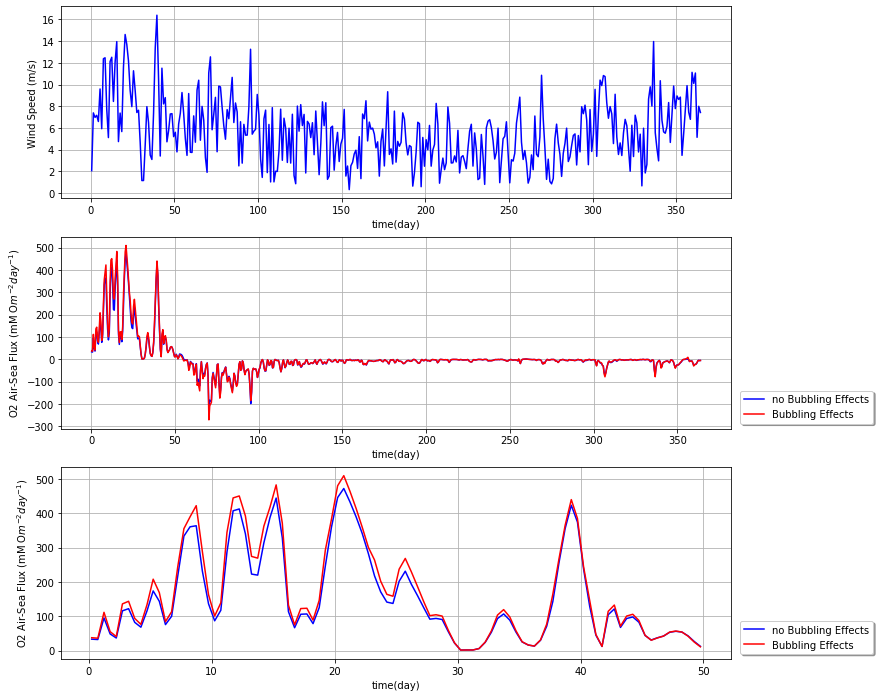

In [10]:
fig, (ax) = plt.subplots(3, 1, figsize=(12,12))

ax[0].plot(wtime,WS[:],'b',label='Wind Speed')
ax[0].grid(b='True', which='major', axis='both')
ax[0].set_xlabel('time(day)')
ax[0].set_ylabel('Wind Speed (m/s)');

ax[1].plot(dtime/(24*3600),Oairn[:,3,3],'b',label='no Bubbling Effects')
ax[1].plot(dtime/(24*3600),Oairb[:,3,3],'r',label='Bubbling Effects')
ax[1].grid(b='True', which='major', axis='both')
ax[1].set_xlabel('time(day)')
ax[1].set_ylabel('O2 Air-Sea Flux (mM O$m^{-2}$$day^{-1}$)');
ax[1].legend(loc='lower right', shadow=True,  bbox_to_anchor=(1.22, 0.0));

ax[2].plot(dtime[0:100]/(24*3600),Oairn[0:100,3,3],'b',label='no Bubbling Effects')
ax[2].plot(dtime[0:100]/(24*3600),Oairb[0:100,3,3],'r',label='Bubbling Effects')
ax[2].grid(b='True', which='major', axis='both')
ax[2].set_xlabel('time(day)')
ax[2].set_ylabel('O2 Air-Sea Flux (mM O$m^{-2}$$day^{-1}$)');
ax[2].legend(loc='lower right', shadow=True,  bbox_to_anchor=(1.22, 0.0));

In [11]:
# Sigma layers fraction
dz1=np.diff(z_rho, axis=1)
dz=np.zeros_like(z_rho)
for i in range(dz1.shape[1]-1):
    dz[:,i+1,:,:]=0.5*(dz1[:,i,:,:]/2+dz1[:,i+1,:,:]/2)
dz[:,0,:,:]=dz1[:,0,:,:]/2
dz[:,-1,:,:]=dz1[:,-1,:,:]/2
sz=np.sum(dz, axis=1)
fz=np.zeros_like(dz)
for i in range(sz.shape[1]):
    for j in range(sz.shape[2]):
        for k in range(sz.shape[0]):
            fz[k,:,i,j]=dz[k,:,i,j]/sz[k,i,j]   # Layers Depth Fraction

In [12]:
# Calculate depth integerated parameters
fOn=np.asarray(On)*fz[:,:,:]
iOn=np.sum(fOn,axis=1)
fOb=np.asarray(Ob)*fz[:,:,:]
iOb=np.sum(fOb,axis=1)

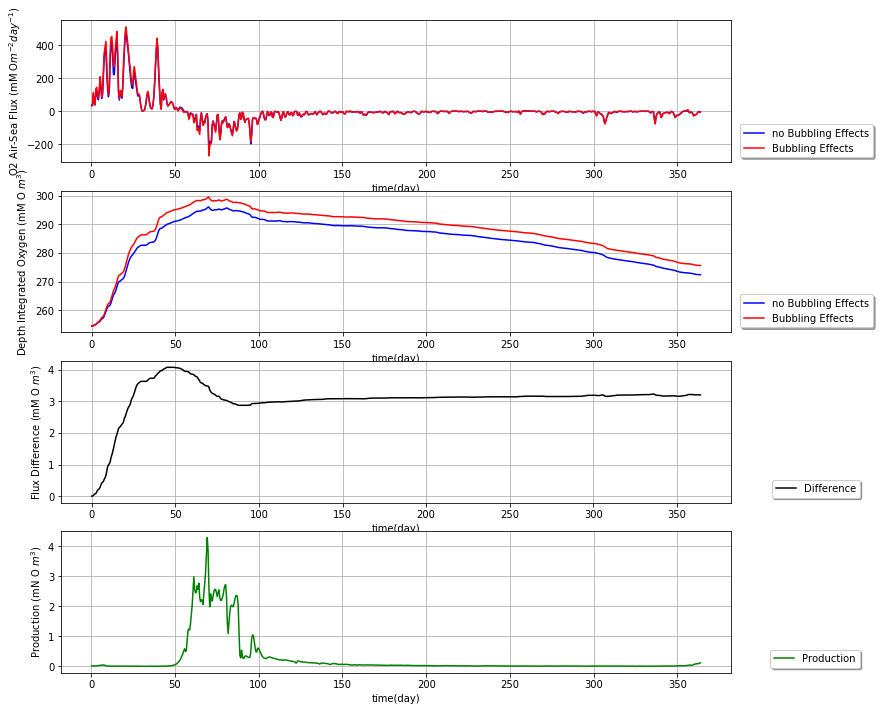

In [13]:
fig, (ax) = plt.subplots(4, 1, figsize=(12,12))

ax[0].plot(dtime/(24*3600),Oairn[:,3,3],'b',label='no Bubbling Effects')
ax[0].plot(dtime/(24*3600),Oairb[:,3,3],'r',label='Bubbling Effects')
ax[0].grid(b='True', which='major', axis='both')
ax[0].set_xlabel('time(day)')
ax[0].set_ylabel('O2 Air-Sea Flux (mM O$m^{-2}$$day^{-1}$)');
ax[0].legend(loc='lower right', shadow=True,  bbox_to_anchor=(1.22, 0.0));

ax[1].plot(htime/(24*3600),iOn[:,3,3],'b',label='no Bubbling Effects')
ax[1].plot(htime/(24*3600),iOb[:,3,3],'r',label='Bubbling Effects')
ax[1].grid(b='True', which='major', axis='both')
ax[1].set_xlabel('time(day)')
ax[1].set_ylabel('Depth Integrated Oxygen (mM O $m^3$)');
ax[1].legend(loc='lower right', shadow=True,  bbox_to_anchor=(1.22, 0.0));

ax[2].plot(htime/(24*3600),iOb[:,3,3]-iOn[:,3,3],'k',label='Difference')
ax[2].grid(b='True', which='major', axis='both')
ax[2].set_xlabel('time(day)')
ax[2].set_ylabel('Flux Difference (mM O $m^3$)');
ax[2].legend(loc='lower right', shadow=True,  bbox_to_anchor=(1.20, 0.0));

ax[3].plot(dtime/(24*3600),PPb[:,29,3,3],'g',label='Production')
ax[3].grid(b='True', which='major', axis='both')
ax[3].set_xlabel('time(day)')
ax[3].set_ylabel('Production (mN O $m^3$)');
ax[3].legend(loc='lower right', shadow=True,  bbox_to_anchor=(1.20, 0.0));

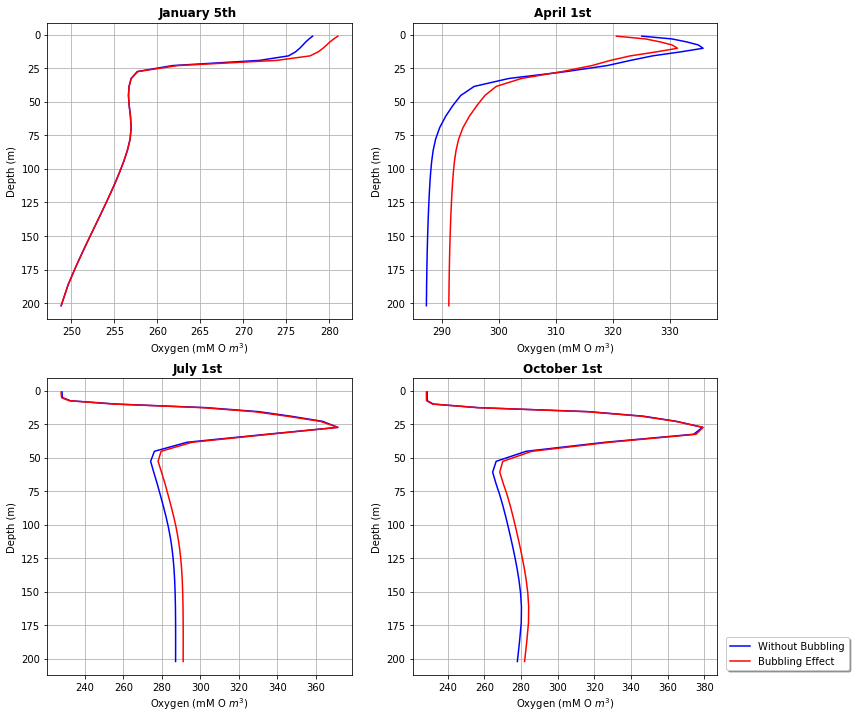

In [14]:
fig, (ax) = plt.subplots(2, 2, figsize=(12,12))

ax[0,0].plot(On[10,:,3,3],-z_rho[-1,:,3,3],'b',label='Without Bubbling')
ax[0,0].plot(Ob[10,:,3,3],-z_rho[-1,:,3,3],'r',label='Bubbling Effect')
ax[0,0].invert_yaxis()
ax[0,0].grid(b='True', which='major', axis='both')
ax[0,0].set_xlabel('Oxygen (mM O $m^3$)')
ax[0,0].set_ylabel('Depth (m)');
ax[0,0].set_title('January 5th ',fontsize=12, fontweight='bold');

ax[0,1].plot(On[182,:,3,3],-z_rho[182,:,3,3],'b',label='Without Bubbling')
ax[0,1].plot(Ob[182,:,3,3],-z_rho[182,:,3,3],'r',label='Bubbling Effect')
ax[0,1].invert_yaxis()
ax[0,1].grid(b='True', which='major', axis='both')
ax[0,1].set_xlabel('Oxygen (mM O $m^3$)')
ax[0,1].set_ylabel('Depth (m)');
ax[0,1].set_title('April 1st ',fontsize=12, fontweight='bold');

ax[1,0].plot(On[365,:,3,3],-z_rho[365,:,3,3],'b',label='Without Bubbling')
ax[1,0].plot(Ob[365,:,3,3],-z_rho[365,:,3,3],'r',label='Bubbling Effect')
ax[1,0].invert_yaxis()
ax[1,0].grid(b='True', which='major', axis='both')
ax[1,0].set_xlabel('Oxygen (mM O $m^3$)')
ax[1,0].set_ylabel('Depth (m)');
ax[1,0].set_title('July 1st ',fontsize=12, fontweight='bold');

ax[1,1].plot(On[545,:,3,3],-z_rho[545,:,3,3],'b',label='Without Bubbling')
ax[1,1].plot(Ob[545,:,3,3],-z_rho[545,:,3,3],'r',label='Bubbling Effect')
ax[1,1].invert_yaxis()
ax[1,1].grid(b='True', which='major', axis='both')
ax[1,1].set_xlabel('Oxygen (mM O $m^3$)')
ax[1,1].set_ylabel('Depth (m)');
ax[1,1].set_title('October 1st ',fontsize=12, fontweight='bold');
ax[1,1].legend(loc='lower right', shadow=True,  bbox_to_anchor=(1.45, 0.0));

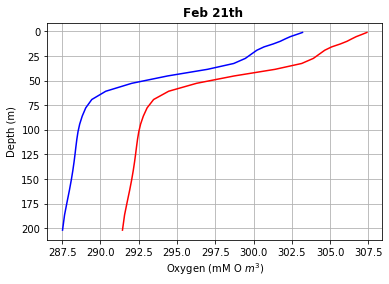

In [15]:
plt.plot(On[100,:,3,3],-z_rho[100,:,3,3],'b',label='Without Bubbling')
plt.plot(Ob[100,:,3,3],-z_rho[100,:,3,3],'r',label='Bubbling Effect')
ax1=plt.gca()
ax1.invert_yaxis()
ax1.grid(b='True', which='major', axis='both')
ax1.set_xlabel('Oxygen (mM O $m^3$)')
ax1.set_ylabel('Depth (m)');
ax1.set_title('Feb 21th ',fontsize=12, fontweight='bold');

### 2. Phytoplankton


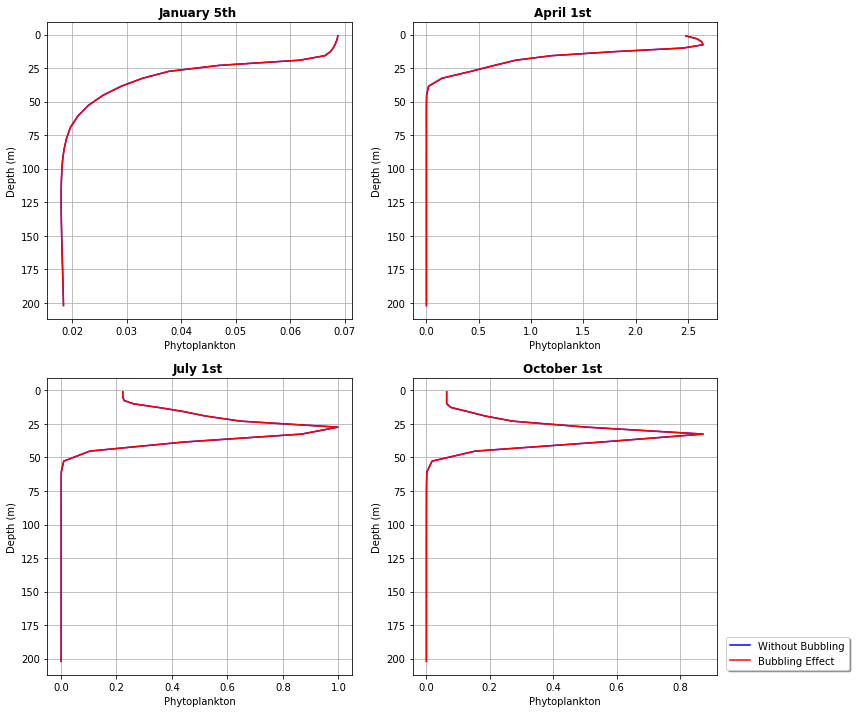

In [16]:
fig, (ax) = plt.subplots(2, 2, figsize=(12,12))

ax[0,0].plot(Pn[10,:,3,3],-z_rho[-1,:,3,3],'b',label='Without Bubbling')
ax[0,0].plot(Pb[10,:,3,3],-z_rho[-1,:,3,3],'r',label='Bubbling Effect')
ax[0,0].invert_yaxis()
ax[0,0].grid(b='True', which='major', axis='both')
ax[0,0].set_xlabel('Phytoplankton')
ax[0,0].set_ylabel('Depth (m)');
ax[0,0].set_title('January 5th ',fontsize=12, fontweight='bold');

ax[0,1].plot(Pn[182,:,3,3],-z_rho[182,:,3,3],'b',label='Without Bubbling')
ax[0,1].plot(Pb[182,:,3,3],-z_rho[182,:,3,3],'r',label='Bubbling Effect')
ax[0,1].invert_yaxis()
ax[0,1].grid(b='True', which='major', axis='both')
ax[0,1].set_xlabel('Phytoplankton')
ax[0,1].set_ylabel('Depth (m)');
ax[0,1].set_title('April 1st ',fontsize=12, fontweight='bold');

ax[1,0].plot(Pn[365,:,3,3],-z_rho[365,:,3,3],'b',label='Without Bubbling')
ax[1,0].plot(Pb[365,:,3,3],-z_rho[365,:,3,3],'r',label='Bubbling Effect')
ax[1,0].invert_yaxis()
ax[1,0].grid(b='True', which='major', axis='both')
ax[1,0].set_xlabel('Phytoplankton')
ax[1,0].set_ylabel('Depth (m)');
ax[1,0].set_title('July 1st ',fontsize=12, fontweight='bold');

ax[1,1].plot(Pn[545,:,3,3],-z_rho[545,:,3,3],'b',label='Without Bubbling')
ax[1,1].plot(Pb[545,:,3,3],-z_rho[545,:,3,3],'r',label='Bubbling Effect')
ax[1,1].invert_yaxis()
ax[1,1].grid(b='True', which='major', axis='both')
ax[1,1].set_xlabel('Phytoplankton')
ax[1,1].set_ylabel('Depth (m)');
ax[1,1].set_title('October 1st ',fontsize=12, fontweight='bold');
ax[1,1].legend(loc='lower right', shadow=True,  bbox_to_anchor=(1.45, 0.0));

### 3. Zooplankton

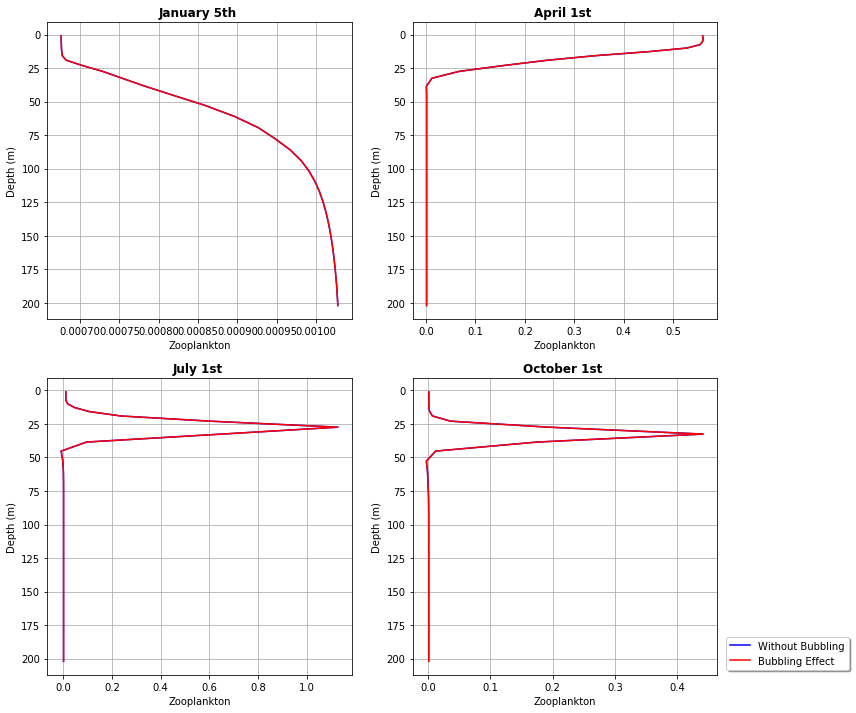

In [17]:
fig, (ax) = plt.subplots(2, 2, figsize=(12,12))

ax[0,0].plot(Zn[10,:,3,3],-z_rho[-1,:,3,3],'b',label='Without Bubbling')
ax[0,0].plot(Zb[10,:,3,3],-z_rho[-1,:,3,3],'r',label='Bubbling Effect')
ax[0,0].invert_yaxis()
ax[0,0].grid(b='True', which='major', axis='both')
ax[0,0].set_xlabel('Zooplankton')
ax[0,0].set_ylabel('Depth (m)');
ax[0,0].set_title('January 5th ',fontsize=12, fontweight='bold');

ax[0,1].plot(Zn[182,:,3,3],-z_rho[182,:,3,3],'b',label='Without Bubbling')
ax[0,1].plot(Zb[182,:,3,3],-z_rho[182,:,3,3],'r',label='Bubbling Effect')
ax[0,1].invert_yaxis()
ax[0,1].grid(b='True', which='major', axis='both')
ax[0,1].set_xlabel('Zooplankton')
ax[0,1].set_ylabel('Depth (m)');
ax[0,1].set_title('April 1st ',fontsize=12, fontweight='bold');

ax[1,0].plot(Zn[365,:,3,3],-z_rho[365,:,3,3],'b',label='Without Bubbling')
ax[1,0].plot(Zb[365,:,3,3],-z_rho[365,:,3,3],'r',label='Bubbling Effect')
ax[1,0].invert_yaxis()
ax[1,0].grid(b='True', which='major', axis='both')
ax[1,0].set_xlabel('Zooplankton')
ax[1,0].set_ylabel('Depth (m)');
ax[1,0].set_title('July 1st ',fontsize=12, fontweight='bold');

ax[1,1].plot(Zn[545,:,3,3],-z_rho[545,:,3,3],'b',label='Without Bubbling')
ax[1,1].plot(Zb[545,:,3,3],-z_rho[545,:,3,3],'r',label='Bubbling Effect')
ax[1,1].invert_yaxis()
ax[1,1].grid(b='True', which='major', axis='both')
ax[1,1].set_xlabel('Zooplankton')
ax[1,1].set_ylabel('Depth (m)');
ax[1,1].set_title('October 1st ',fontsize=12, fontweight='bold');
ax[1,1].legend(loc='lower right', shadow=True,  bbox_to_anchor=(1.45, 0.0));

## 4. Wind Forcing (future +1m/s) 

In [18]:
Uwindp=dwp.variables['Uwind']
Vwindp=dwp.variables['Vwind']
WSp=np.sqrt(np.power(Uwindp, 2)+np.power(Vwindp, 2))

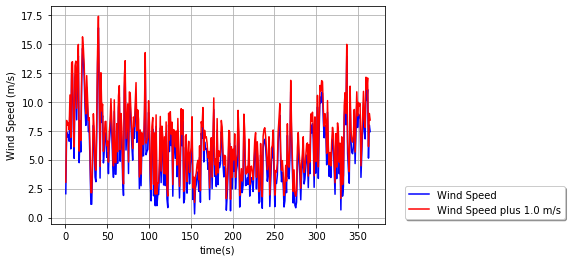

In [19]:
fig,

plt.plot(wtime,WS[:],'b',label='Wind Speed')
plt.plot(wtime,WSp[:],'r',label='Wind Speed plus 1.0 m/s')
ax1=plt.gca()
ax1.grid(b='True', which='major', axis='both')
ax1.set_xlabel('time(s)')
ax1.set_ylabel('Wind Speed (m/s)');
ax1.legend(loc='lower right', shadow=True,  bbox_to_anchor=(1.55, 0.0));

In [20]:
# Export varibles from wind plus 1.0 model

# without bubbling
Np=dhp.variables['NO3'][:]
Zp=dhp.variables['zooplankton'][:]
Pp=dhp.variables['phytoplankton'][:]
Op=dhp.variables['oxygen'][:]


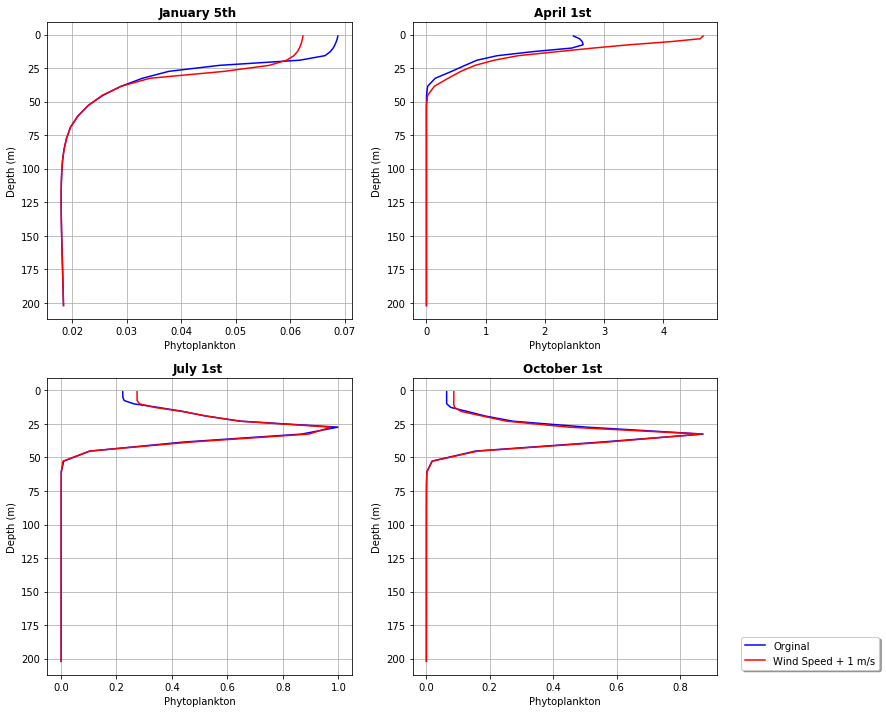

In [21]:
fig, (ax) = plt.subplots(2, 2, figsize=(12,12))

ax[0,0].plot(Pn[10,:,3,3],-z_rho[-1,:,3,3],'b',label='Orginal')
ax[0,0].plot(Pp[10,:,3,3],-z_rho[-1,:,3,3],'r',label='Wind Speed + 1 m/s')
ax[0,0].invert_yaxis()
ax[0,0].grid(b='True', which='major', axis='both')
ax[0,0].set_xlabel('Phytoplankton')
ax[0,0].set_ylabel('Depth (m)');
ax[0,0].set_title('January 5th ',fontsize=12, fontweight='bold');

ax[0,1].plot(Pn[182,:,3,3],-z_rho[182,:,3,3],'b',label='Orginal')
ax[0,1].plot(Pp[182,:,3,3],-z_rho[182,:,3,3],'r',label='Wind Speed + 1 m/s')
ax[0,1].invert_yaxis()
ax[0,1].grid(b='True', which='major', axis='both')
ax[0,1].set_xlabel('Phytoplankton')
ax[0,1].set_ylabel('Depth (m)');
ax[0,1].set_title('April 1st ',fontsize=12, fontweight='bold');

ax[1,0].plot(Pn[365,:,3,3],-z_rho[365,:,3,3],'b',label='Orginal')
ax[1,0].plot(Pp[365,:,3,3],-z_rho[365,:,3,3],'r',label='Bubbling Effect')
ax[1,0].invert_yaxis()
ax[1,0].grid(b='True', which='major', axis='both')
ax[1,0].set_xlabel('Phytoplankton')
ax[1,0].set_ylabel('Depth (m)');
ax[1,0].set_title('July 1st ',fontsize=12, fontweight='bold');

ax[1,1].plot(Pn[545,:,3,3],-z_rho[545,:,3,3],'b',label='Orginal')
ax[1,1].plot(Pp[545,:,3,3],-z_rho[545,:,3,3],'r',label='Wind Speed + 1 m/s')
ax[1,1].invert_yaxis()
ax[1,1].grid(b='True', which='major', axis='both')
ax[1,1].set_xlabel('Phytoplankton')
ax[1,1].set_ylabel('Depth (m)');
ax[1,1].set_title('October 1st ',fontsize=12, fontweight='bold');
ax[1,1].legend(loc='lower right', shadow=True,  bbox_to_anchor=(1.55, 0.0));

In [22]:
# Export CO2 Air Sea Exchange
Oairn=ddn.variables['O2_airsea'][:]

Oairp=ddp.variables['O2_airsea'][:]

Cairn=ddn.variables['CO2_airsea'][:]

Cairp=ddp.variables['CO2_airsea'][:]

pCO2n=ddn.variables['pCO2'][:]

pCO2p=ddp.variables['pCO2'][:]

dnitn=ddn.variables['denitrification'][:]
dnitp=ddp.variables['denitrification'][:]

ddn.variables['denitrification'].units



'millimole_nitrogen meter-2 day-1'

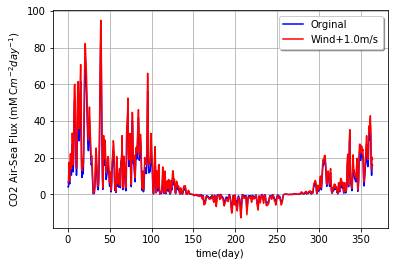

In [23]:
fig,
plt.plot(dtime/(24*3600),Cairn[:,3,3],'b',label='Orginal')
plt.plot(dtime/(24*3600),Cairp[:,3,3],'r',label='Wind+1.0m/s')
ax1=plt.gca()
ax1.grid(b='True', which='major', axis='both')
ax1.set_xlabel('time(day)')
ax1.set_ylabel('CO2 Air-Sea Flux (mM C$m^{-2}$$day^{-1}$)');
ax1.legend(loc='lower right', shadow=True,  bbox_to_anchor=(1.0, 0.8));

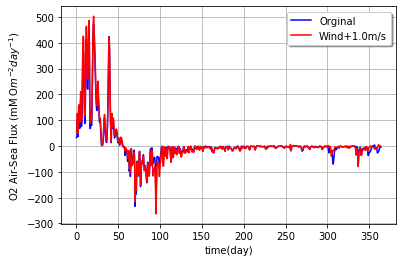

In [24]:
fig,
plt.plot(dtime/(24*3600),Oairn[:,3,3],'b',label='Orginal')
plt.plot(dtime/(24*3600),Oairp[:,3,3],'r',label='Wind+1.0m/s')
ax1=plt.gca()
ax1.grid(b='True', which='major', axis='both')
ax1.set_xlabel('time(day)')
ax1.set_ylabel('O2 Air-Sea Flux (mM O$m^{-2}$$day^{-1}$)');
ax1.legend(loc='lower right', shadow=True,  bbox_to_anchor=(1.0, 0.8));

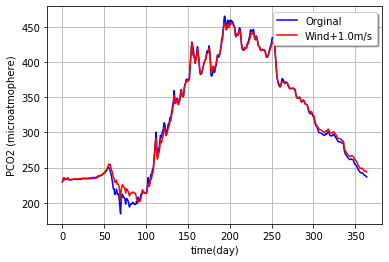

In [25]:
fig,
plt.plot(dtime/(24*3600),pCO2n[:,3,3],'b',label='Orginal')
plt.plot(dtime/(24*3600),pCO2p[:,3,3],'r',label='Wind+1.0m/s')
ax1=plt.gca()
ax1.grid(b='True', which='major', axis='both')
ax1.set_xlabel('time(day)')
ax1.set_ylabel('PCO2 (microatmophere)');
ax1.legend(loc='lower right', shadow=True,  bbox_to_anchor=(1.0, 0.8));

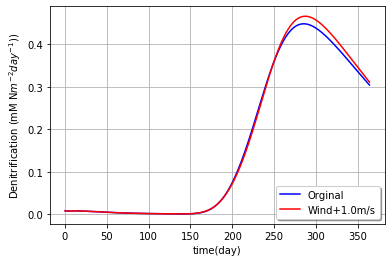

In [26]:
fig,
plt.plot(dtime/(24*3600),dnitn[:,3,3],'b',label='Orginal')
plt.plot(dtime/(24*3600),dnitp[:,3,3],'r',label='Wind+1.0m/s')
ax1=plt.gca()
ax1.grid(b='True', which='major', axis='both')
ax1.set_xlabel('time(day)')
ax1.set_ylabel('Denitrification (mM N$m^{-2}$$day^{-1}$))');
ax1.legend(loc='lower right', shadow=True,  bbox_to_anchor=(1.0, 0.0));

## 5. Temp (future +3 C) 

In [27]:
# Export varibles from wind plus 1.0 model

# without bubbling
Nt=dht.variables['NO3'][:]
Zt=dht.variables['zooplankton'][:]
Pt=dht.variables['phytoplankton'][:]
Ot=dht.variables['oxygen'][:]


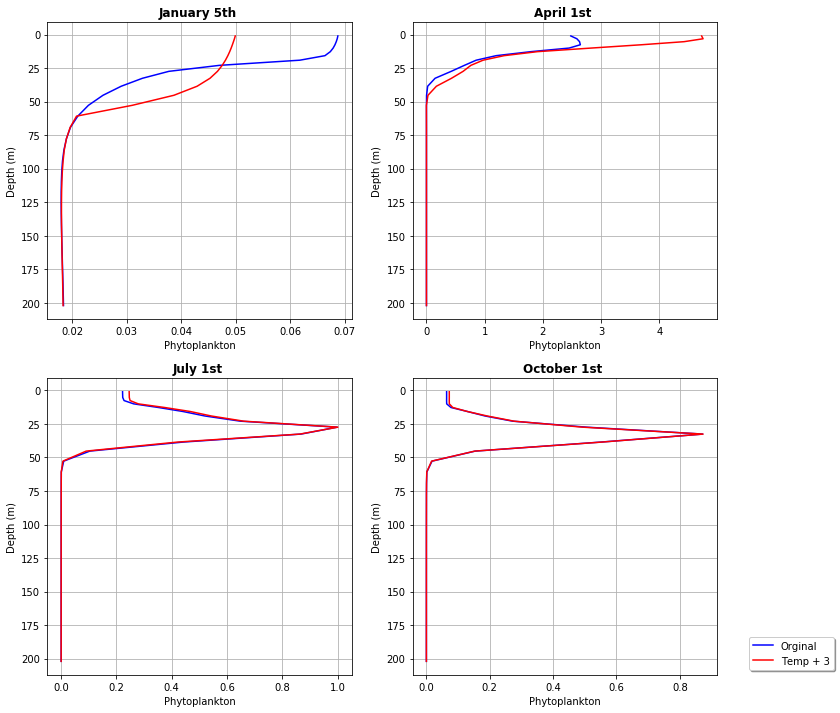

In [28]:
fig, (ax) = plt.subplots(2, 2, figsize=(12,12))

ax[0,0].plot(Pn[10,:,3,3],-z_rho[-1,:,3,3],'b',label='Orginal')
ax[0,0].plot(Pt[10,:,3,3],-z_rho[-1,:,3,3],'r',label='Temp + 3')
ax[0,0].invert_yaxis()
ax[0,0].grid(b='True', which='major', axis='both')
ax[0,0].set_xlabel('Phytoplankton')
ax[0,0].set_ylabel('Depth (m)');
ax[0,0].set_title('January 5th ',fontsize=12, fontweight='bold');

ax[0,1].plot(Pn[182,:,3,3],-z_rho[182,:,3,3],'b',label='Orginal')
ax[0,1].plot(Pt[182,:,3,3],-z_rho[182,:,3,3],'r',label='Temp + 3')
ax[0,1].invert_yaxis()
ax[0,1].grid(b='True', which='major', axis='both')
ax[0,1].set_xlabel('Phytoplankton')
ax[0,1].set_ylabel('Depth (m)');
ax[0,1].set_title('April 1st ',fontsize=12, fontweight='bold');

ax[1,0].plot(Pn[365,:,3,3],-z_rho[365,:,3,3],'b',label='Orginal')
ax[1,0].plot(Pt[365,:,3,3],-z_rho[365,:,3,3],'r',label='Temp + 3')
ax[1,0].invert_yaxis()
ax[1,0].grid(b='True', which='major', axis='both')
ax[1,0].set_xlabel('Phytoplankton')
ax[1,0].set_ylabel('Depth (m)');
ax[1,0].set_title('July 1st ',fontsize=12, fontweight='bold');

ax[1,1].plot(Pn[545,:,3,3],-z_rho[545,:,3,3],'b',label='Orginal')
ax[1,1].plot(Pt[545,:,3,3],-z_rho[545,:,3,3],'r',label='Temp + 3')
ax[1,1].invert_yaxis()
ax[1,1].grid(b='True', which='major', axis='both')
ax[1,1].set_xlabel('Phytoplankton')
ax[1,1].set_ylabel('Depth (m)');
ax[1,1].set_title('October 1st ',fontsize=12, fontweight='bold');
ax[1,1].legend(loc='lower right', shadow=True,  bbox_to_anchor=(1.4 , 0.0));


In [29]:
# Export CO2 Air Sea Exchange
Oairt=ddt.variables['O2_airsea'][:]
Cairt=ddt.variables['CO2_airsea'][:]
pCO2t=ddt.variables['pCO2'][:]
dnitt=ddt.variables['denitrification'][:]

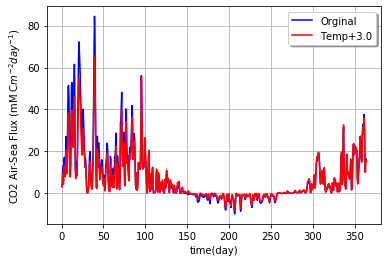

In [30]:
fig,
plt.plot(dtime/(24*3600),Cairn[:,3,3],'b',label='Orginal')
plt.plot(dtime/(24*3600),Cairt[:,3,3],'r',label='Temp+3.0')
ax1=plt.gca()
ax1.grid(b='True', which='major', axis='both')
ax1.set_xlabel('time(day)')
ax1.set_ylabel('CO2 Air-Sea Flux (mM C$m^{-2}$$day^{-1}$)');
ax1.legend(loc='lower right', shadow=True,  bbox_to_anchor=(1.0, 0.8));

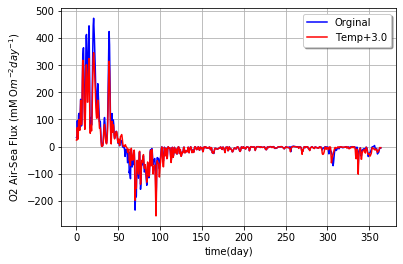

In [31]:
fig,
plt.plot(dtime/(24*3600),Oairn[:,3,3],'b',label='Orginal')
plt.plot(dtime/(24*3600),Oairt[:,3,3],'r',label='Temp+3.0')
ax1=plt.gca()
ax1.grid(b='True', which='major', axis='both')
ax1.set_xlabel('time(day)')
ax1.set_ylabel('O2 Air-Sea Flux (mM O$m^{-2}$$day^{-1}$)');
ax1.legend(loc='lower right', shadow=True,  bbox_to_anchor=(1.0, 0.8));

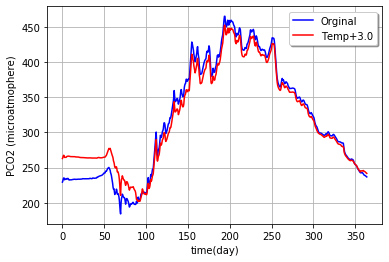

In [32]:
fig,
plt.plot(dtime/(24*3600),pCO2n[:,3,3],'b',label='Orginal')
plt.plot(dtime/(24*3600),pCO2t[:,3,3],'r',label='Temp+3.0')
ax1=plt.gca()
ax1.grid(b='True', which='major', axis='both')
ax1.set_xlabel('time(day)')
ax1.set_ylabel('PCO2 (microatmophere)');
ax1.legend(loc='lower right', shadow=True,  bbox_to_anchor=(1.0, 0.8));

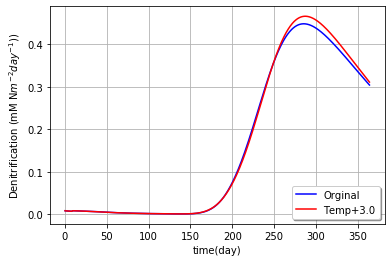

In [33]:
fig,
plt.plot(dtime/(24*3600),dnitn[:,3,3],'b',label='Orginal')
plt.plot(dtime/(24*3600),dnitp[:,3,3],'r',label='Temp+3.0')
ax1=plt.gca()
ax1.grid(b='True', which='major', axis='both')
ax1.set_xlabel('time(day)')
ax1.set_ylabel('Denitrification (mM N$m^{-2}$$day^{-1}$))');
ax1.legend(loc='lower right', shadow=True,  bbox_to_anchor=(1.0, 0.0));